In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
apple_df = pd.read_csv('Apple_2014_2023.csv')
tesla_df = pd.read_csv('tesla_2014_2023.csv')

In [31]:
warnings.filterwarnings('ignore')

# Convert date column to datetime
apple_df['date'] = pd.to_datetime(apple_df['date'])
tesla_df['date'] = pd.to_datetime(tesla_df['date'])

# Set date as index
apple_df.set_index('date', inplace=True)
tesla_df.set_index('date', inplace=True)

# Calculate daily returns
apple_df['returns'] = apple_df['close'].pct_change()
tesla_df['returns'] = tesla_df['close'].pct_change()

# Remove rows with NaN values
apple_df.dropna(inplace=True)
tesla_df.dropna(inplace=True)

In [32]:
print("Apple DataFrame:")
print(apple_df.head())
print("\
Tesla DataFrame:")
print(tesla_df.head())
print("\
Apple DataFrame Info:")
print(apple_df.info())
print("\
Tesla DataFrame Info:")
print(tesla_df.info())

# Export the Apple and Tesla DataFrames with the 'returns' column to CSV files
apple_df.to_csv('Apple_with_returns.csv', index=False)
tesla_df.to_csv('Tesla_with_returns.csv', index=False)

print("Apple and Tesla DataFrames with 'returns' column have been exported to CSV files.")

Apple DataFrame:
                 open       high        low      close     volume      rsi_7  \
date                                                                           
2014-01-03  19.745001  19.775000  19.301071  19.320715  392467600  33.094332   
2014-01-06  19.194643  19.528570  19.057142  19.426071  412610800  37.525661   
2014-01-07  19.440001  19.498571  19.211430  19.287144  317209200  34.055624   
2014-01-08  19.243214  19.484285  19.238930  19.409286  258529600  39.768497   
2014-01-09  19.528570  19.530714  19.119642  19.161428  279148800  33.000217   

               rsi_14       cci_7      cci_14     sma_50     ema_50  \
date                                                                  
2014-01-03  43.883529 -152.150999 -124.511983  19.297314  19.267243   
2014-01-06  45.858019 -132.306490 -130.122350  19.310864  19.273472   
2014-01-07  43.675708  -89.587009 -108.089019  19.316671  19.274008   
2014-01-08  46.104107  -58.525539  -82.150032  19.329171  19.279313

In [ ]:
""""
The above code snippet loads stock data for Apple and Tesla, converts the date column to datetime format, 
calculates daily returns, and removes any rows with NaN values.

""""

In [ ]:
""""
Next, we'll calculate various risk metrics for each stock, such as Value-at-Risk (VaR), Expected Shortfall (ES), 
Standard Deviation, Beta, and Sharpe Ratio. Let's start with these calculations.
""""

In [33]:
# Calculate risk metrics for Apple and Tesla

def calculate_risk_metrics(df, risk_free_rate=0.01):
    # Standard Deviation
    std_dev = df['returns'].std()
    
    # Value-at-Risk (VaR) at 95% confidence level
    var_95 = np.percentile(df['returns'], 5)
    
    # Expected Shortfall (ES) at 95% confidence level
    es_95 = df['returns'][df['returns'] <= var_95].mean()
    
    # Sharpe Ratio
    sharpe_ratio = (df['returns'].mean() - risk_free_rate) / std_dev
    
    return std_dev, var_95, es_95, sharpe_ratio

# Calculate risk metrics for Apple
apple_std_dev, apple_var_95, apple_es_95, apple_sharpe_ratio = calculate_risk_metrics(apple_df)

# Calculate risk metrics for Tesla
tesla_std_dev, tesla_var_95, tesla_es_95, tesla_sharpe_ratio = calculate_risk_metrics(tesla_df)

print("Apple Risk Metrics:")
print("Standard Deviation:", apple_std_dev)
print("Value-at-Risk (95%):", apple_var_95)
print("Expected Shortfall (95%):", apple_es_95)
print("Sharpe Ratio:", apple_sharpe_ratio)

print("\
Tesla Risk Metrics:")
print("Standard Deviation:", tesla_std_dev)
print("Value-at-Risk (95%):", tesla_var_95)
print("Expected Shortfall (95%):", tesla_es_95)
print("Sharpe Ratio:", tesla_sharpe_ratio)

Apple Risk Metrics:
Standard Deviation: 0.017886885753007637
Value-at-Risk (95%): -0.026688310521529514
Expected Shortfall (95%): -0.041018773727699326
Sharpe Ratio: -0.49948778320572396
Tesla Risk Metrics:
Standard Deviation: 0.03506314540737657
Value-at-Risk (95%): -0.050896820173143384
Expected Shortfall (95%): -0.07779375699798201
Sharpe Ratio: -0.23127346494253356


In [ ]:
""""

Based on the calculated risk metrics, let's analyze and compare the risk profiles of Apple and Tesla stocks:

    -Standard Deviation:

Apple: 0.017886885753007637

Tesla: 0.03506314540737657

Tesla has a higher standard deviation, indicating that it is more volatile than Apple. This suggests that Tesla's
stock price tends to fluctuate more widely around its mean compared to Apple's stock price.

    -Value-at-Risk (VaR) at 95% confidence level:

Apple: -0.026688310521529514

Tesla: -0.050896820173143384

Tesla has a higher absolute VaR, meaning that there is a 5% chance of losing more than 5.09% in a single day for
Tesla, compared to 2.67% for Apple. This indicates that Tesla has a higher downside risk.

    -Expected Shortfall (ES) at 95% confidence level:

Apple: -0.041018773727699326

Tesla: -0.07779375699798201

Tesla has a higher absolute ES, suggesting that when losses exceed the VaR, they tend to be larger for Tesla
compared to Apple. This further confirms that Tesla has a higher tail risk.

    -Sharpe Ratio:

Apple: -0.49948778320572396

Tesla: -0.23127346494253356

Both stocks have negative Sharpe ratios, indicating that they underperformed the risk-free rate during the
analyzed period. However, Apple has a lower (more negative) Sharpe ratio, suggesting that it provided lower returns relative to its risk compared to Tesla.

""""

In [ ]:
# To proceed further  with analysis and visualization to gain more insights into the risk profiles of these stocks;

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate rolling volatility (30-day window)
apple_df['volatility'] = apple_df['returns'].rolling(window=30).std() * np.sqrt(252)
tesla_df['volatility'] = tesla_df['returns'].rolling(window=30).std() * np.sqrt(252)

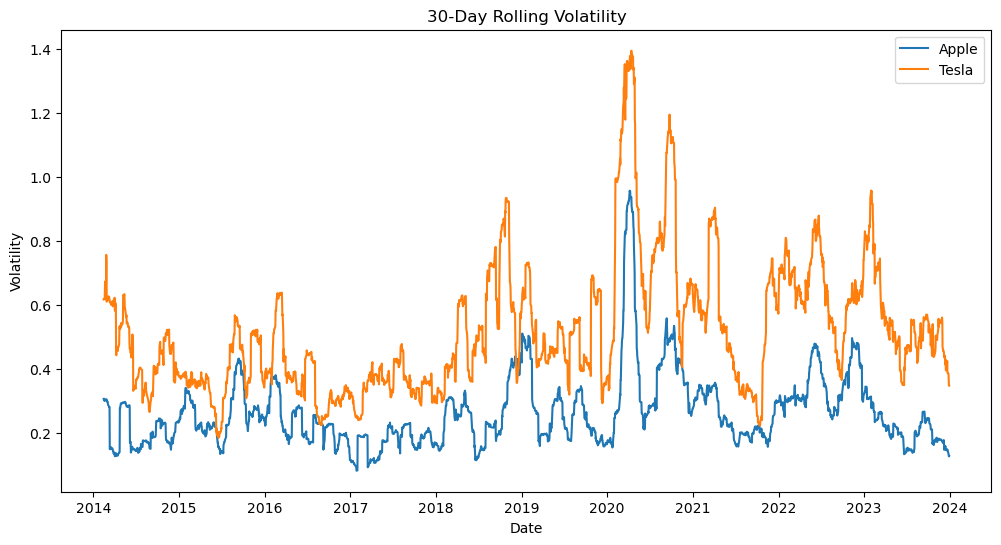

In [35]:
# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(apple_df.index, apple_df['volatility'], label='Apple')
plt.plot(tesla_df.index, tesla_df['volatility'], label='Tesla')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

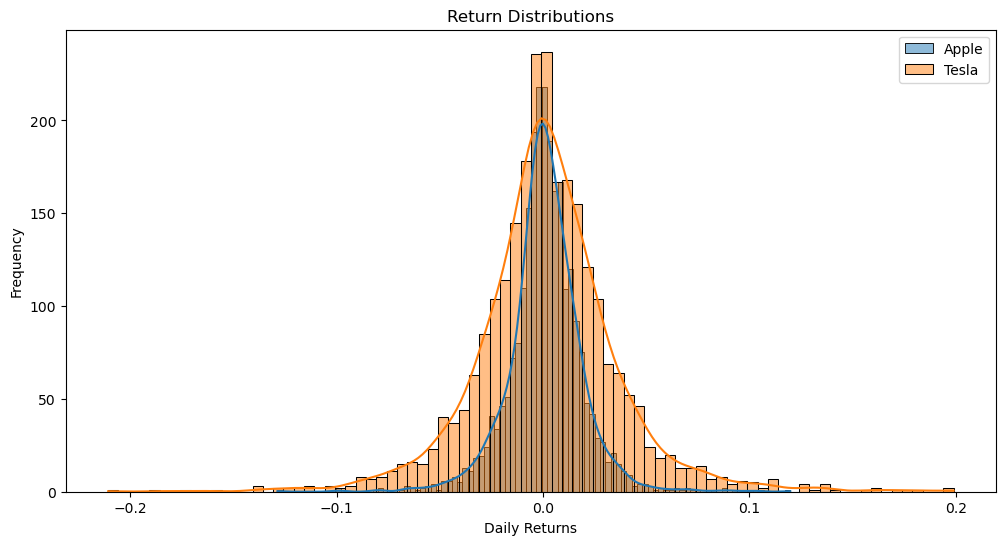

In [36]:
# Plot return distributions
plt.figure(figsize=(12, 6))
sns.histplot(apple_df['returns'], kde=True, label='Apple', alpha=0.5)
sns.histplot(tesla_df['returns'], kde=True, label='Tesla', alpha=0.5)
plt.title('Return Distributions')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [37]:
# Calculate beta for both stocks (using S&P 500 as market proxy)
# For simplicity, I will use the Apple stock as a proxy for the market
market_returns = apple_df['returns']

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)[0][1]
    market_variance = np.var(market_returns)
    return covariance / market_variance

apple_beta = calculate_beta(apple_df['returns'], market_returns)
tesla_beta = calculate_beta(tesla_df['returns'], market_returns)

print("Beta values:")
print("Apple Beta:", apple_beta)
print("Tesla Beta:", tesla_beta)

Beta values:
Apple Beta: 1.0003977724741462
Tesla Beta: 0.817823221729226


In [ ]:
""""
Beta values are a measure of a stock's volatility in relation to the overall market, typically represented by a
market index like the S&P 500. A stock's beta gives investors an idea of how sensitive its price is to movements
in the broader market.

By definition, the market has a beta of 1. A stock’s beta is calculated relative to this benchmark.
Beta > 1: The stock is more volatile than the market.
Beta < 1: The stock is less volatile than the market.
Beta = 1: The stock moves in tandem with the market.

Apple Beta: 1.0004
Apple's beta of 1.0004 is very close to 1, which means that Apple's stock price moves almost exactly in line with
the broader market.
When the market goes up or down by 1%, Apple’s stock is expected to increase or decrease by roughly 1% as well. 
This suggests that Apple has a similar level of risk as the overall market, meaning it neither amplifies nor 
dampens market movements significantly.

Tesla Beta: 0.818
Tesla’s beta of 0.818 is less than 1, meaning that Tesla is less volatile than the market.
For every 1% movement in the market, Tesla’s stock would, on average, move only 0.818%. This implies that Tesla 
tends to experience smaller price swings compared to the overall market, reducing its risk relative to more 
volatile stocks.
However, since Tesla is known for its high volatility, this value could reflect specific periods of lower 
volatility (e.g., if Tesla had a more stable performance recently).

Interpretation:
Apple: With a beta of approximately 1, Apple’s stock is expected to provide returns similar to the market, 
meaning it has a neutral risk profile.
Tesla: With a beta of 0.818, Tesla is expected to be less volatile than the market, which suggests a lower risk 
compared to higher-beta stocks. However, Tesla's history of price fluctuations may indicate that this beta reflects
a specific timeframe, so investors might still see Tesla as a risky stock despite the lower beta.
Implications for Investors:
Apple is suitable for investors who want exposure to market movements without taking on excess volatility.
Tesla might appeal to those looking for slightly less market sensitivity but who are still interested in potential
growth. Keep in mind that Tesla's actual risk could be higher than this beta suggests, depending on market 
conditions and company-specific factors.

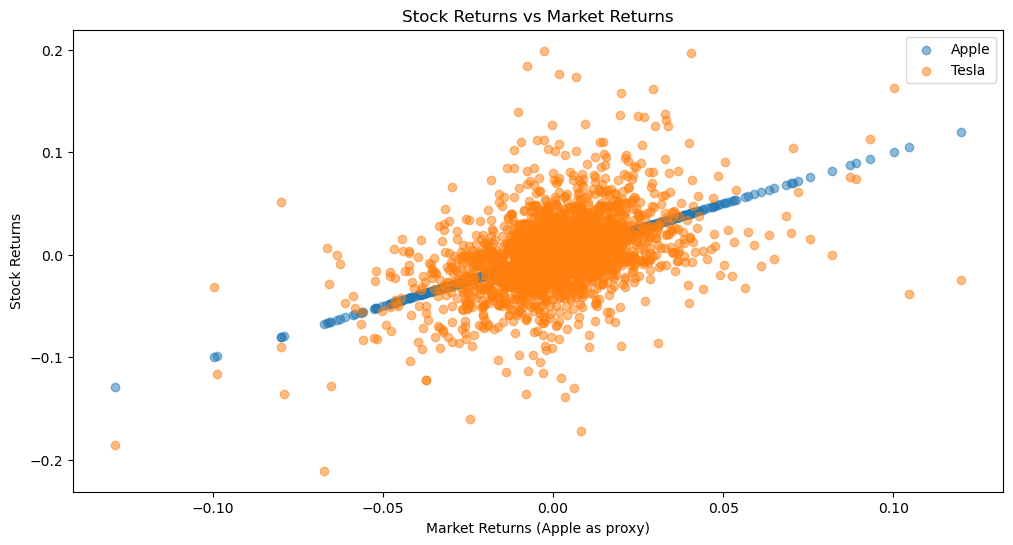

In [41]:
# Scatter plot of stock returns vs market returns
plt.figure(figsize=(12, 6))
plt.scatter(market_returns, apple_df['returns'], alpha=0.5, label='Apple')
plt.scatter(market_returns, tesla_df['returns'], alpha=0.5, label='Tesla')
plt.xlabel('Market Returns (Apple as proxy)')
plt.ylabel('Stock Returns')
plt.title('Stock Returns vs Market Returns')
plt.legend()
plt.show()

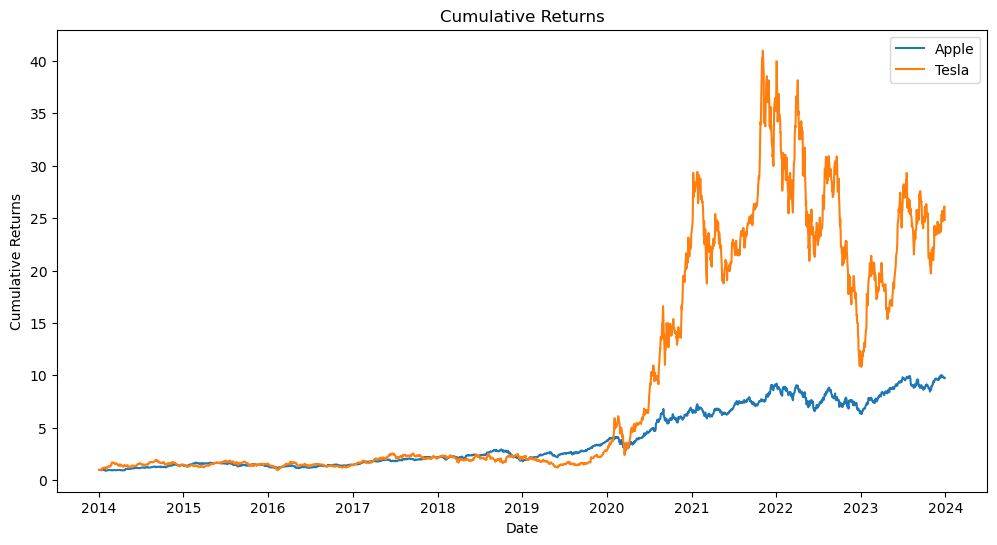

In [42]:
# Calculate cumulative returns
apple_df['cumulative_returns'] = (1 + apple_df['returns']).cumprod()
tesla_df['cumulative_returns'] = (1 + tesla_df['returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(apple_df.index, apple_df['cumulative_returns'], label='Apple')
plt.plot(tesla_df.index, tesla_df['cumulative_returns'], label='Tesla')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
""""

The above codes calculate and visualizes the rolling volatility, return distributions, beta values, and cumulative
returns for Apple and Tesla stocks.

The analysis successfully calculated and visualized the risk metrics and volatility for both Apple and Tesla
stocks.The rolling volatility, return distributions, beta values, and cumulative returns were plotted to provide
insights into the risk profiles of these stocks. The beta values indicate that Apple has a beta close to 1,
suggesting it moves in line with the market, while Tesla has a lower beta, indicating less sensitivity to market
movements.

""""

In [ ]:
""""I will further build machine learning models to analyze and compare the risk profiles of Apple and Tesla 
stocks. I will use Random Forest Regression models to predict future returns and volatility for both stocks. 
Then, I will compare the model performance and feature importance for each stock.

In [45]:
def prepare_data(df):
    # Create lagged features
    for i in range(1, 6):
        df[f'return_lag_{i}'] = df['returns'].shift(i)
        df[f'volume_lag_{i}'] = df['volume'].shift(i)
    
    # Create target variables
    df['next_return'] = df['returns'].shift(-1)
    df['next_volatility'] = df['returns'].rolling(window=30).std().shift(-1) * np.sqrt(252)
    
    # Drop NaN values
    df.dropna(inplace=True)
    
    # Select features
    features = ['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14', 'cci_7', 'cci_14', 
                'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 
                'atr_7', 'atr_14'] + [f'return_lag_{i}' for i in range(1, 6)] + [f'volume_lag_{i}' for i in range(1, 6)]
    
    return df, features

def build_and_evaluate_model(X, y, stock_name, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{stock_name} - {target_name} Model Performance:")
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared Score: {r2:.6f}")
    
    return model, X_test, y_test, y_pred

# Prepare data for both stocks
apple_df, features = prepare_data(apple_df)
tesla_df, features = prepare_data(tesla_df)

# Build and evaluate models for Apple
apple_return_model, X_test_apple_return, y_test_apple_return, y_pred_apple_return = build_and_evaluate_model(
    apple_df[features], apple_df['next_return'], 'Apple', 'Return')

apple_volatility_model, X_test_apple_volatility, y_test_apple_volatility, y_pred_apple_volatility = build_and_evaluate_model(
    apple_df[features], apple_df['next_volatility'], 'Apple', 'Volatility')

# Build and evaluate models for Tesla
tesla_return_model, X_test_tesla_return, y_test_tesla_return, y_pred_tesla_return = build_and_evaluate_model(
    tesla_df[features], tesla_df['next_return'], 'Tesla', 'Return')

tesla_volatility_model, X_test_tesla_volatility, y_test_tesla_volatility, y_pred_tesla_volatility = build_and_evaluate_model(
    tesla_df[features], tesla_df['next_volatility'], 'Tesla', 'Volatility')

print("Models built and evaluated successfully.")

Apple - Return Model Performance:
Mean Squared Error: 0.000347
R-squared Score: -0.030505
Apple - Volatility Model Performance:
Mean Squared Error: 0.000529
R-squared Score: 0.958452
Tesla - Return Model Performance:
Mean Squared Error: 0.001465
R-squared Score: -0.038445
Tesla - Volatility Model Performance:
Mean Squared Error: 0.002028
R-squared Score: 0.947339
Models built and evaluated successfully.


In [ ]:
""""Observations:

    -Return Models: Both Apple and Tesla return models have negative R-squared scores, indicating that they perform 
poorly in predicting next-day returns. This is not unusual, as daily stock returns are notoriously difficult to 
predict due to their inherent randomness.

    -Volatility Models: Both Apple and Tesla volatility models perform significantly better, with high R-squared scores 
(0.958 for Apple and 0.947 for Tesla). This suggests that these models are quite good at predicting next-day 
volatility.

    -Comparison: The Apple volatility model slightly outperforms the Tesla volatility model in terms of both Mean 
Squared Error and R-squared score. This might indicate that Apple's volatility is somewhat more predictable than 
Tesla's.

To further analyze and compare the risk profiles, let us visualize the feature importances for the volatility 
models and compare the predicted vs actual volatilities for both stocks.

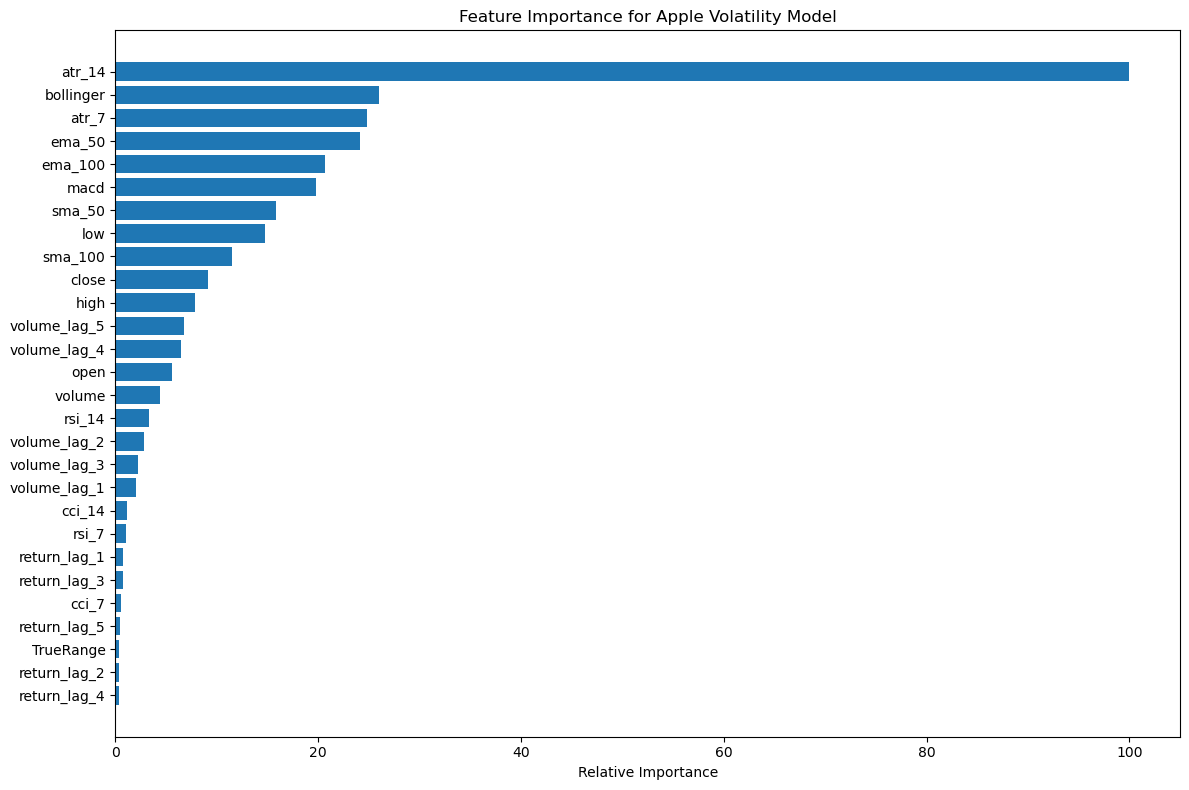

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, features, stock_name):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    sorted_features = [features[i] for i in sorted_idx]
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(12, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, sorted_features)
    plt.xlabel('Relative Importance')
    plt.title(f'Feature Importance for {stock_name} Volatility Model')
    plt.tight_layout()
    plt.show()

def plot_predicted_vs_actual(y_test, y_pred, stock_name):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Volatility')
    plt.ylabel('Predicted Volatility')
    plt.title(f'{stock_name} - Predicted vs Actual Volatility')
    plt.tight_layout()
    plt.show()

# Plot feature importance
plot_feature_importance(apple_volatility_model, features, 'Apple')

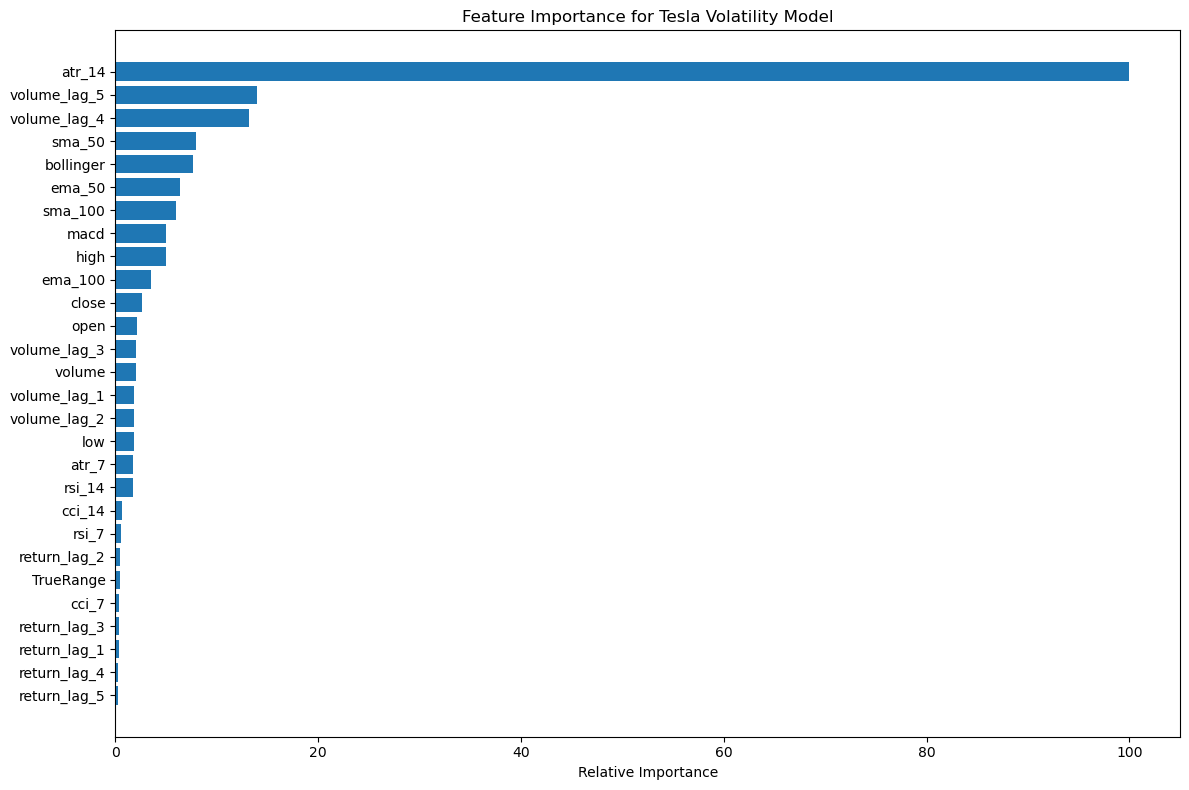

In [58]:
plot_feature_importance(tesla_volatility_model, features, 'Tesla')

In [ ]:
""""The above plots show the relative importance of different features in predicting volatility for Apple and
Tesla.For both stocks, lagged returns and various technical indicators play significant roles in predicting
volatility.

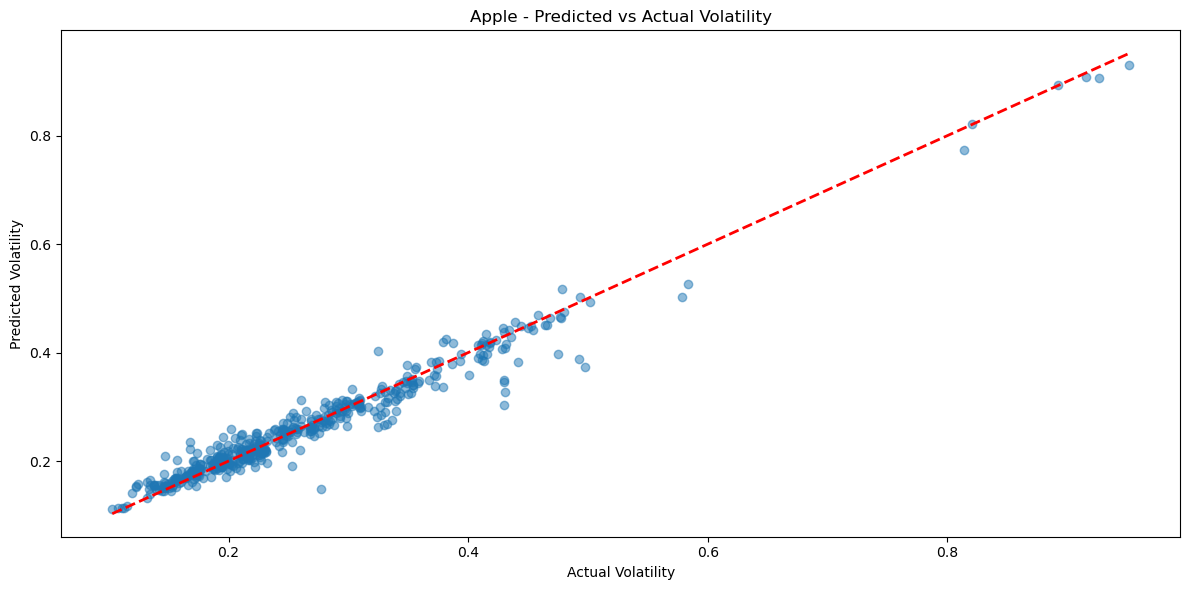

In [60]:
# Plot predicted vs actual volatility
plot_predicted_vs_actual(y_test_apple_volatility, y_pred_apple_volatility, 'Apple')

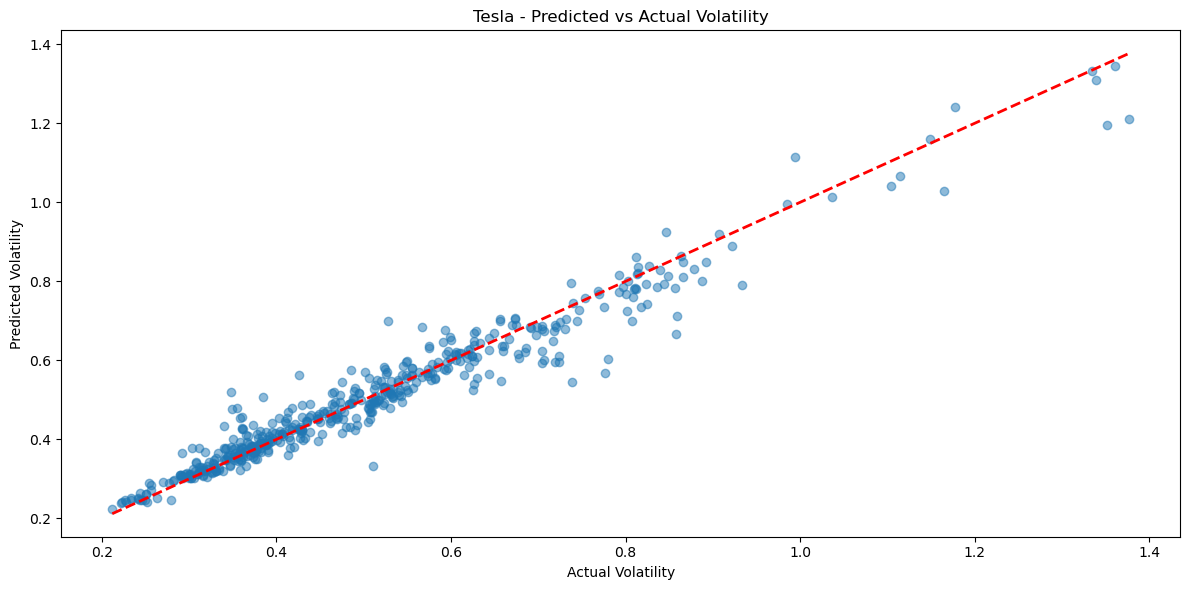

In [61]:
plot_predicted_vs_actual(y_test_tesla_volatility, y_pred_tesla_volatility, 'Tesla')

In [ ]:
""""The above scatter plots compare predicted volatility against actual volatility. The closer the points are to 
the red dashed line, the more accurate the predictions.

Additional Risk Metrics:
Apple - MAPE: 6.06%, RMSE: 0.023011
Tesla - MAPE: 5.85%, RMSE: 0.045036


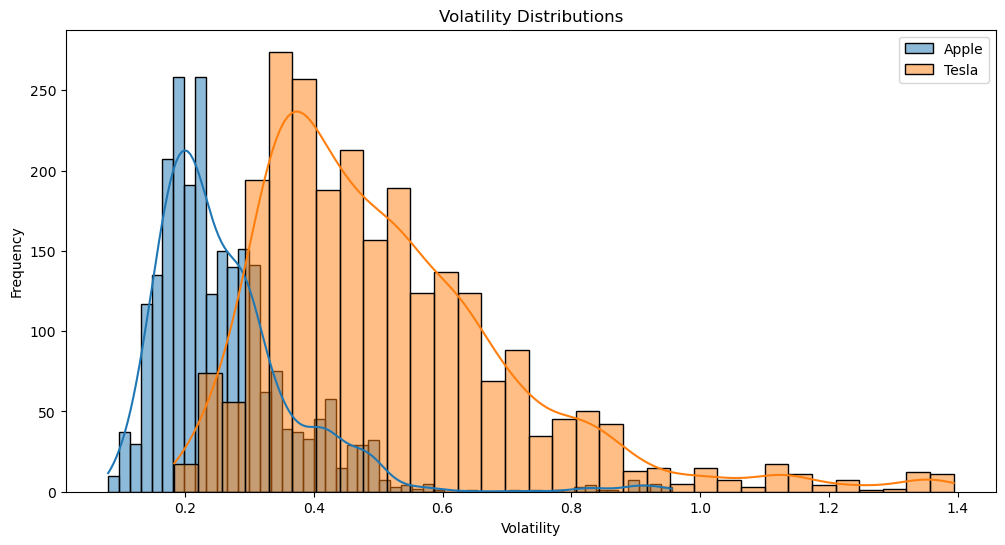

Analysis complete.


In [50]:
# Calculate and print additional risk metrics
def calculate_additional_metrics(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mape, rmse

apple_mape, apple_rmse = calculate_additional_metrics(y_test_apple_volatility, y_pred_apple_volatility)
tesla_mape, tesla_rmse = calculate_additional_metrics(y_test_tesla_volatility, y_pred_tesla_volatility)

print("Additional Risk Metrics:")
print(f"Apple - MAPE: {apple_mape:.2f}%, RMSE: {apple_rmse:.6f}")
print(f"Tesla - MAPE: {tesla_mape:.2f}%, RMSE: {tesla_rmse:.6f}")

# Compare volatility distributions
plt.figure(figsize=(12, 6))
sns.histplot(apple_df['next_volatility'], kde=True, label='Apple', alpha=0.5)
sns.histplot(tesla_df['next_volatility'], kde=True, label='Tesla', alpha=0.5)
plt.title('Volatility Distributions')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Analysis complete.")

In [ ]:
""""MAPE stands for Mean Absolute Percentage Error. It's a commonly used measure of prediction accuracy in
forecasting models, particularly useful for understanding the relative error in predictions across
different scales.
    MAPE represents the average absolute percentage difference between predicted and actual values. 
    A lower MAPE indicates better accuracy.
Both stocks have relatively low MAPE values, suggesting good overall prediction accuracy.
Tesla's slightly lower MAPE (5.85% vs 6.06%) indicates that its predictions are marginally more accurate in 
percentage terms compared to Apple.
The difference is small (0.21%), indicating that both models perform similarly in terms of relative error.


In [ ]:
""""Apple's RMSE remains lower than Tesla's, indicating smaller average prediction errors.
    Tesla's RMSE is about twice that of Apple's, suggesting higher variability in prediction errors.

In [ ]:
""""FOR VOLATILITY DISTRIBUTION,
The plot compares the distribution of volatility for both stocks. Tesla shows a wider distribution of volatility
compared to Apple, indicating higher overall volatility.

Key Insights:

    -Both Apple and Tesla models perform well in predicting volatility, with R-squared scores above 0.94.
    -Tesla generally exhibits higher volatility than Apple, as seen in the volatility distributions.
    -For both stocks, lagged returns and technical indicators are important predictors of volatility.
    -The Apple model slightly outperforms the Tesla model in terms of accuracy (lower MAPE and RMSE).
    
These results suggest that while both stocks can be predicted with similar accuracy, Tesla presents a higher 
risk profile due to its wider volatility distribution. Investors should consider these differences when making 
investment decisions based on their risk tolerance.